# 1. Import Libraries

In [51]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, roc_auc_score ,roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np

# 2. Load Data

In [50]:
unmon_features= pd.read_csv('../features/modified_datasets/unmon_features.csv')
mon_features= pd.read_csv('../features/modified_datasets/mon_features.csv')
mon_labels = pd.read_csv('../features/modified_datasets/mon_labels.csv')


In [52]:
mon_features = mon_features[['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst']]
unmon_features = unmon_features[['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst']]

In [53]:
mon_features['label'] = mon_labels.values
unmon_features['label'] = -1
labeled_idx = range(19000)
unlabeled_idx = range(19000, 29000)

combined_data = pd.concat([mon_features, unmon_features], axis=0, ignore_index= True)
combined_data.fillna(0, inplace=True)

X = combined_data.drop('label', axis=1)
y = combined_data['label']

X

,total_num,total_sum_dir,inpkt_num,inpkt_avg_ordering,inpkt_std_ordering,outpkt_num,outpkt_avg_ordering,outpkt_std_ordering,inpkt_count_burst,outpkt_count_burst
0,1421,-603648,1300,704.106154,398.486335,121,773.322314,515.483953,78,78
1,518,-183296,438,264.406393,150.591146,80,226.162500,139.231951,47,47
2,1358,-574464,1240,668.259677,381.878642,118,786.110169,472.735508,76,76
3,1446,-615424,1324,713.503021,406.205288,122,820.139344,513.916038,80,80
4,1406,-602112,1291,694.740511,395.028889,115,789.608696,503.993490,79,79
...,...,...,...,...,...,...,...,...,...,...
28995,4593,-1928704,4180,2270.961722,1337.407077,413,2549.414044,1173.380403,256,255
28996,5110,-2158592,4663,2505.849024,1450.994832,447,3062.015660,1621.869237,225,224
28997,361,-124416,302,180.175497,101.241755,59,179.101695,118.245320,28,28
28998,509,-162304,413,241.169492,138.848134,96,309.197917,166.667122,56,56


# 3. Preprocess Data


In [56]:
X_train, X_test, y_train, y_test = train_test_split(mon_features, mon_labels, random_state=42)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(14250, 11) (4750, 11)


In [57]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='macro'))
print("Recall", recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9225263157894736
Precision 0.9237612928686709
Recall 0.9235040876938695

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.98      0.89      0.93        47
           2       0.98      0.98      0.98        48
           3       0.93      1.00      0.96        37
           4       0.98      1.00      0.99        44
           5       0.96      0.95      0.95        56
           6       0.98      0.98      0.98        58
           7       1.00      1.00      1.00        53
           8       0.96      0.96      0.96        49
           9       0.97      0.84      0.90        38
          10       0.96      0.87      0.91        55
          11       0.89      0.91      0.90        45
          12       0.96      0.98      0.97        55
          13       0.84      0.84      0.84        45
          14       0.87      0.88      0.88        52
          15       0.83   

# 5. Hyperparameter Tuning

In [58]:
#하이퍼파라미터 튜닝(GridSearch)
param_grid = {
    # 'n_estimators': [500,1000,1500],
    'n_estimators': [300],
    'max_depth': [10, 20, 30,40,50],
    'max_leaf_nodes':[100,200,300],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator = rf_model,param_grid = param_grid, cv = 5,scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_


print("Best parameters:", best_params)
print("Best Model:\n", best_rf_model)
print("Best Accuracy:", best_accuracy)



Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, n_estimators=300; total time=  11.0s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, n_estimators=300; total time=  11.2s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, n_estimators=300; total time=  11.2s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, n_estimators=300; total time=  11.3s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, n_estimators=300; total time=  11.3s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, n_estimators=300; total time=  11.5s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, n_estimators=300; total time=  11.6s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, n_estimators=300; total time=  11.6s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, n_estimators=300; total time=  11.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, n_estimators=300; total time=  11.8s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=300, n_estimators=300; total time=  11.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=300, n_estimators=300; total time=  11.7s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=300, n_estimators=300; total time=  11.4s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=300, n_estimators=300; total time=  11.7s
[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=300, n_estimators=300; total time=  11.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=100, n_estimators=300; total time=  12.3s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=100, n_estimators=300; total time=  12.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=100, n_estimators=300; total time=  12.5s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=100, n_estimators=300; total time=  12.6s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=100, n_estimators=300; total time=  12.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, n_estimators=300; total time=  14.3s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, n_estimators=300; total time=  14.9s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=  13.0s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, n_estimators=300; total time=  14.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, n_estimators=300; total time=  14.9s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, n_estimators=300; total time=  14.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=  12.7s
[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=300, n_estimators=300; total time=  15.9s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=300, n_estimators=300; total time=  15.6s
[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=  12.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=300, n_estimators=300; total time=  15.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=300, n_estimators=300; total time=  15.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=300, n_estimators=300; total time=  16.1s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=  13.5s
[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=  13.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=200, n_estimators=300; total time=  15.4s
[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=200, n_estimators=300; total time=  15.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=200, n_estimators=300; total time=  15.6s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=200, n_estimators=300; total time=  15.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=200, n_estimators=300; total time=  15.5s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=300, n_estimators=300; total time=  16.2s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=300, n_estimators=300; total time=  16.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=300, n_estimators=300; total time=  16.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=300, n_estimators=300; total time=  16.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=100, n_estimators=300; total time=  12.9s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=100, n_estimators=300; total time=  12.8s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=100, n_estimators=300; total time=  13.0s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=300, n_estimators=300; total time=  15.9s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=100, n_estimators=300; total time=  13.0s
[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=100, n_estimators=300; total time=  13.0s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=200, n_estimators=300; total time=  15.1s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=200, n_estimators=300; total time=  14.6s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=200, n_estimators=300; total time=  14.8s
[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=200, n_estimators=300; total time=  14.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=200, n_estimators=300; total time=  14.7s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=300, n_estimators=300; total time=  15.5s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=100, n_estimators=300; total time=  12.6s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=300, n_estimators=300; total time=  15.2s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=300, n_estimators=300; total time=  15.5s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=100, n_estimators=300; total time=  12.2s
[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=300, n_estimators=300; total time=  15.4s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=100, n_estimators=300; total time=  12.5s
[CV] END class_weight=balanced, max_depth=40, max_leaf_nodes=300, n_estimators=300; total time=  15.6s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=100, n_estimators=300; total time=  12.6s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=100, n_estimators=300; total time=  12.6s


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=200, n_estimators=300; total time=  14.5s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=200, n_estimators=300; total time=  13.8s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=200, n_estimators=300; total time=  13.8s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=200, n_estimators=300; total time=  13.6s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=200, n_estimators=300; total time=  13.4s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=300, n_estimators=300; total time=  13.9s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=300, n_estimators=300; total time=  14.2s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=300, n_estimators=300; total time=  13.8s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=300, n_estimators=300; total time=  13.8s
[CV] END class_weight=balanced, max_depth=50, max_leaf_nodes=300, n_estim

/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'max_leaf_nodes': 300, 'n_estimators': 300}
Best Model:
 RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_leaf_nodes=300, n_estimators=300, random_state=1)
Best Accuracy: 0.8633684210526316


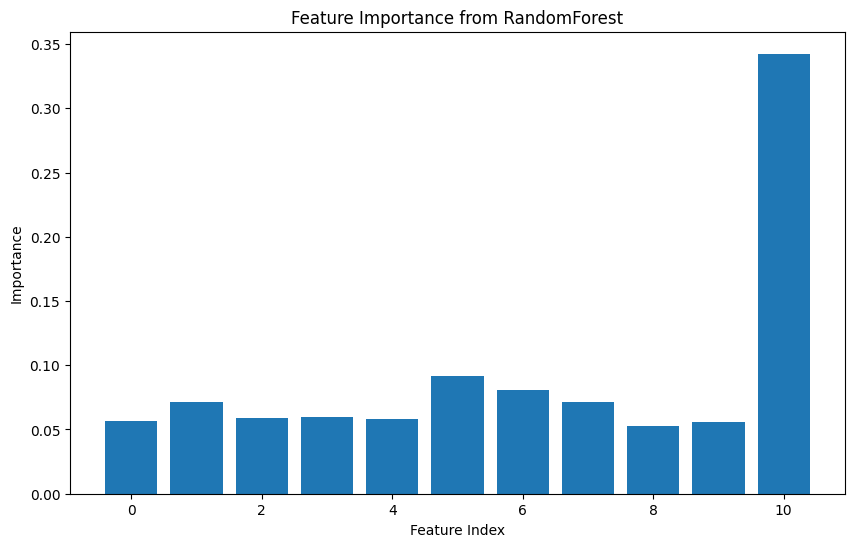

Selected Features Index: [ 1  5  6  7 10]
Number of Important Features: 5


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Accuracy (Selected Features): 0.9583157894736842

Confusion Matrix (Selected Features):
 [[51  0  0 ...  0  0  0]
 [ 2 44  1 ...  0  0  0]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 55]]

Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.94      0.97        47
           2       0.98      0.98      0.98        48
           3       0.95      1.00      0.97        37
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        56
           6       1.00      0.98      0.99        58
           7       1.00      1.00      1.00        53
           8       0.96      0.98      0.97        49
           9       0.97      0.92      0.95        38
          10       0.95      0.96      0.95        55
          11       0.95      0.93      0.94        45
      

In [65]:
# 특성 중요도 확인
feature_importances = rf_model.feature_importances_

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance from RandomForest')
plt.show()

# 중요도 기준으로 상위 N개 특성 선택
threshold = 0.07  # 중요도 기준 (조정 가능)
important_features = np.where(feature_importances >= threshold)[0]
print(f"Selected Features Index: {important_features}")
print(f"Number of Important Features: {len(important_features)}")

# 선택된 중요 특성 데이터로 새로운 학습 데이터셋 구성
X_train_selected = X_train_scaled[:, important_features]
X_test_selected = X_test_scaled[:, important_features]

# 새로운 학습 데이터로 RandomForest 학습
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# 성능 평가
y_pred_selected = rf_model_selected.predict(X_test_selected)
print("\nAccuracy (Selected Features):", accuracy_score(y_test, y_pred_selected))
print("\nConfusion Matrix (Selected Features):\n", confusion_matrix(y_test, y_pred_selected))
print("\nClassification Report (Selected Features):\n", classification_report(y_test, y_pred_selected))

In [66]:
# 성능 평가
y_pred_selected = rf_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
print("\nAccuracy (Selected Features):", accuracy_selected)
print("\nConfusion Matrix (Selected Features):\n", conf_matrix_selected)
print("\nClassification Report (Selected Features):\n", classification_report(y_test, y_pred_selected))

# 확률 예측 (predict_proba 활용)
y_pred_proba_selected = rf_model_selected.predict_proba(X_test_selected)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_selected, pos_label=1)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred_proba_selected, pos_label=1)
pr_auc = auc(recall_values, precision_values)

# 최종 성능 출력
print(f"\nAccuracy (Tuned Model): {accuracy_selected:.4f}")
print(f"Confusion Matrix (Tuned Model):\n{conf_matrix_selected}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")



Accuracy (Selected Features): 0.9583157894736842

Confusion Matrix (Selected Features):
 [[51  0  0 ...  0  0  0]
 [ 2 44  1 ...  0  0  0]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  0 ...  0  0 55]]

Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.94      0.97        47
           2       0.98      0.98      0.98        48
           3       0.95      1.00      0.97        37
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        56
           6       1.00      0.98      0.99        58
           7       1.00      1.00      1.00        53
           8       0.96      0.98      0.97        49
           9       0.97      0.92      0.95        38
          10       0.95      0.96      0.95        55
          11       0.95      0.93      0.94        45
      

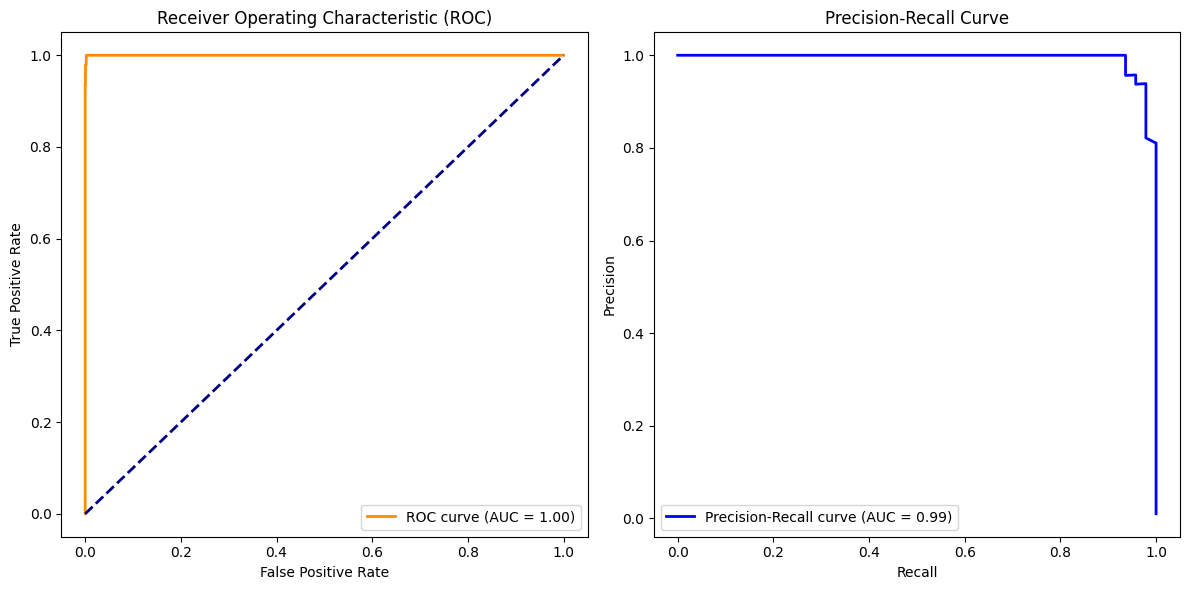

In [67]:
# Plot ROC and Precision-Recall Curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_values, precision_values, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# 6. Evaluate the Tuned Model


In [68]:
# Predict using the best model from GridSearchCV
y_pred_random = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy_best = accuracy_score(y_test, y_pred_random)
conf_matrix_best = confusion_matrix(y_test, y_pred_random)

# Compute precision and recall for positive class (assuming binary classification)
precision = precision_score(y_test, y_pred_random, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred_random, average='macro')  # 'macro' for multi-class

# Calculate ROC and Precision-Recall AUC for binary classification
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

precision_values, recall_values, _ = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], pos_label=1)
pr_auc = auc(recall_values, precision_values)

# Print metrics
print(f"Accuracy (Tuned Model): {accuracy_best:.4f}")
print(f"Confusion Matrix (Tuned Model):\n{conf_matrix_best}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")

Accuracy (Tuned Model): 0.0116
Confusion Matrix (Tuned Model):
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 48]
 ...
 [ 0  0  0 ...  0  0 44]
 [ 0  0  0 ...  0  0 47]
 [ 0  0  0 ...  0  0 55]]
Precision: 0.0001
Recall: 0.0105
ROC AUC: 0.5000
Precision-Recall AUC: 0.5049


/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/minseokim/miniconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# 7. Visualize Results

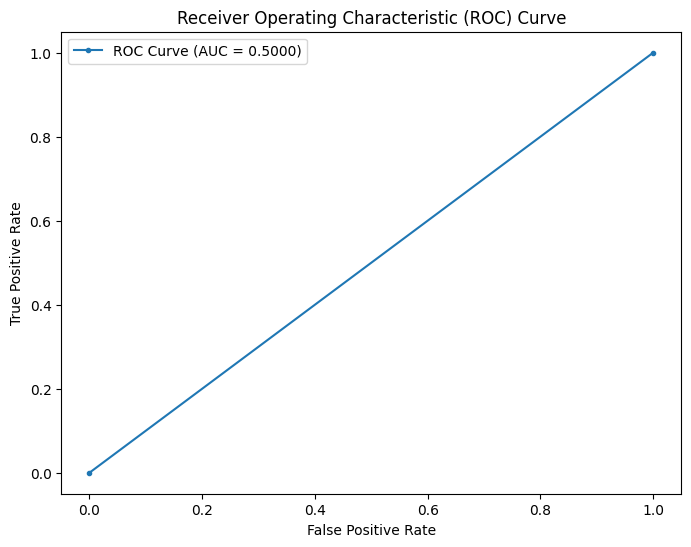

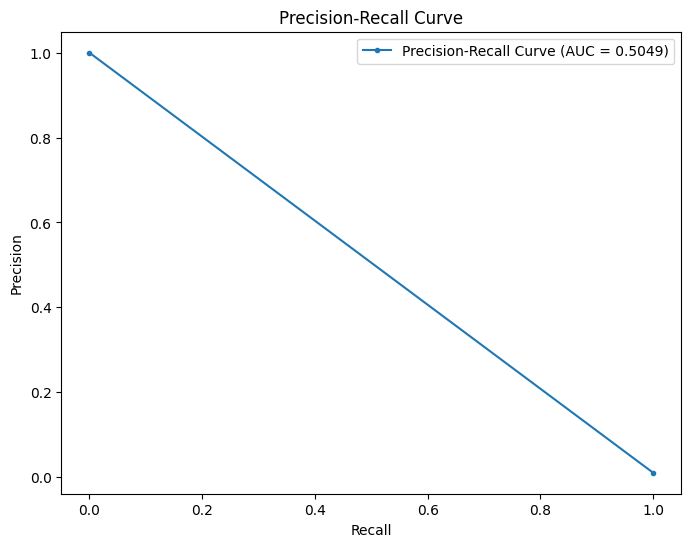

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Visualize Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label=f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()